<a href="https://colab.research.google.com/github/dpanagop/ML_and_AI_examples/blob/master/Credit_Fraud_detection_with_autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Credit Card Fraud Detection

Example of outlier detection with autoencoders. Dataset https://www.kaggle.com/mlg-ulb/creditcardfraud from Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles).

It is a highly unbalanced dataset with a very low percetnage of fraudulent credit card transactions. Our purpose is to build a classifier for detecting fraudulent transactions. In this example we will consider them as outliers an will use an autoencoder for detecting them.

##Downloading of dataset


In [0]:
!wget -O creditfraud.zip https://www.dropbox.com/s/tl20yp9bcl56oxt/creditcardfraud.zip?dl=0

--2019-11-28 04:07:01--  https://www.dropbox.com/s/tl20yp9bcl56oxt/creditcardfraud.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/tl20yp9bcl56oxt/creditcardfraud.zip [following]
--2019-11-28 04:07:01--  https://www.dropbox.com/s/raw/tl20yp9bcl56oxt/creditcardfraud.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc00eb81e39e15f3e7eb2a63114c.dl.dropboxusercontent.com/cd/0/inline/AtO36T9HrRh1lv1X4fjHDp-az5GX_fQBx6A61o9S1_nNE-TcE7NM7JZn0DGhfBBlU8mOYfEJHXW3CQtlDePz3MNOWL2idFgKSLncClCeI9wGThnDQolRYxt3iLzCqPRbRHw/file# [following]
--2019-11-28 04:07:01--  https://uc00eb81e39e15f3e7eb2a63114c.dl.dropboxusercontent.com/cd/0/inline/AtO36T9HrRh1lv1X4fjHDp-az5GX_fQBx6A61o9S1_nNE-TcE7NM7JZn0DGhfBBlU8mOYfEJHXW3CQtlDePz3MNO

In [0]:
!unzip creditfraud.zip

Archive:  creditfraud.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: creditcard.csv          


##Loading libraries

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from keras.models import Model, load_model
from keras.layers import Input, Dense

Using TensorFlow backend.


##Loading dataset in Python and taking a first look

In [0]:
dat=pd.read_csv('creditcard.csv')
dat.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The dataset is highly unbalanced with very few fraudulent credit cards

In [0]:
dat['Class'].value_counts()/dat['Class'].count()

0    0.998273
1    0.001727
Name: Class, dtype: float64

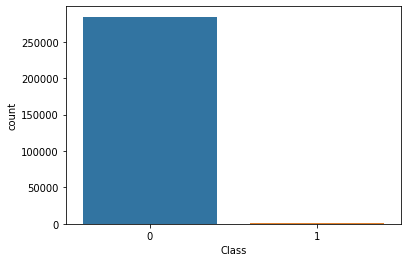

In [0]:
sns.countplot(x='Class',data=dat)

In [0]:
dat = dat.drop([ 'Time'], 1)
dat['Amount'] = StandardScaler().fit_transform(dat['Amount'].values.reshape(-1, 1))

Splitting into train and test datasets

In [0]:
X_train, X_test, y_train, y_test = train_test_split(dat.drop('Class',1) , dat['Class'], test_size=0.5, random_state=0)

In [0]:
y_test.value_counts()/y_test.count()

0    0.998294
1    0.001706
Name: Class, dtype: float64

In [0]:
y_train.value_counts()/y_train.count()

0    0.998251
1    0.001749
Name: Class, dtype: float64

##First method: using autoencoder's regression error

For our first example we will train our autoencoder only on non fraudulent cases

In [0]:
X_train_normal = X_train[y_train==0]
X_train_fraud = X_train[y_train==1]

Building an autoencoder with
- an input layer with 29 neurons,
- a hidden layer with 12 neurons,
- an output layer with 29 neurons

In [0]:
input_layer = Input(shape=(29, ))
encoded = Dense(12,activation='tanh')(input_layer)
decoded = Dense(29,activation='sigmoid')(encoded)
autoencoder = Model(input_layer,decoded)

In [0]:
autoencoder.compile(optimizer='adam',loss='mean_squared_error')

In [0]:
autoencoder.fit(X_train_normal, X_train_normal, epochs = 100, batch_size=128,
validation_data=(X_train_normal,X_train_normal))




Train on 142154 samples, validate on 142154 samples
Epoch 1/100





142154/142154 [==============================] - 3s 18us/step - loss: 0.9911 - val_loss: 0.8843
Epoch 2/100
142154/142154 [==============================] - 2s 16us/step - loss: 0.8598 - val_loss: 0.8426
Epoch 3/100
142154/142154 [==============================] - 2s 16us/step - loss: 0.8328 - val_loss: 0.8244
Epoch 4/100
142154/142154 [==============================] - 2s 16us/step - loss: 0.8182 - val_loss: 0.8125
Epoch 5/100
142154/142154 [==============================] - 2s 17us/step - loss: 0.8080 - val_loss: 0.8037
Epoch 6/100
142154/142154 [==============================] - 2s 17us/step - loss: 0.8004 - val_loss: 0.7972
Epoch 7/100
142154/142154 [==============================] - 2s 17us/step - loss: 0.7946 - val_loss: 0.7921
Epoch 8/100
142154/142154 [==============================] - 3s 18us/step - loss: 0.7903 - val_loss: 0.7885
Epoch 9/100
142154/142154 [==============================] - 3s 19us/step - 

In [0]:
predictions = autoencoder.predict(X_train)
mse = np.mean(np.power(X_train - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_train})
error_df.groupby('true_class').describe()

reconstruction_error             ...                       
                          count       mean  ...        75%         max
true_class                                  ...                       
0                      142154.0   0.767519  ...   0.645605  318.941692
1                         249.0  29.855354  ...  26.808312  282.265950

[2 rows x 8 columns]

As we can see above the error for non fraudulent case is lower than the error for fraudulent cases. We use a threshold of mean plus 3 sds to classify the test set.

In [0]:
test_predictions=autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - test_predictions, 2), axis=1)
y_pred=[(lambda er: 1 if er>=11.078922  else 0)(er) for er in mse]

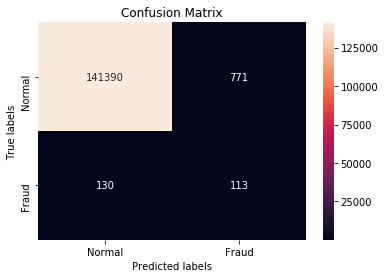

In [0]:
conf_matrix = metrics.confusion_matrix(y_test,y_pred)

ax=plt.subplot()
sns.heatmap(conf_matrix,annot=True,ax=ax,fmt='g')#annot=True to annotate cells, fmt='g' numbers not scientific form
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Normal', 'Fraud']); ax.yaxis.set_ticklabels(['Normal', 'Fraud']);
ax.set(yticks=[0, 2], 
       xticks=[0.5, 1.5])
ax.yaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0.5))

##Second method: using encoder part of autoencoder and k-NN

We train using all cases (fraud/non-fraud)in train dataset and use the result to map the instances into a 12-dimensional space. The mapped cases are fed to k-NN for classification.

In [0]:
input_layer_all = Input(shape=(29, ))
encoded_all = Dense(12,activation='tanh')(input_layer_all)
decoded_all = Dense(29,activation='sigmoid')(encoded_all)
autoencoder_all = Model(input_layer_all,decoded_all)
autoencoder_all.compile(optimizer='adam',loss='mean_squared_error')
autoencoder_all.fit(X_train, X_train, epochs = 100, batch_size=128,
validation_data=(X_train,X_train))

Train on 142403 samples, validate on 142403 samples
Epoch 1/100
142403/142403 [==============================] - 3s 20us/step - loss: 1.0494 - val_loss: 0.9373
Epoch 2/100
142403/142403 [==============================] - 3s 19us/step - loss: 0.9123 - val_loss: 0.8942
Epoch 3/100
142403/142403 [==============================] - 2s 17us/step - loss: 0.8835 - val_loss: 0.8743
Epoch 4/100
142403/142403 [==============================] - 2s 17us/step - loss: 0.8679 - val_loss: 0.8622
Epoch 5/100
142403/142403 [==============================] - 2s 17us/step - loss: 0.8580 - val_loss: 0.8540
Epoch 6/100
142403/142403 [==============================] - 2s 17us/step - loss: 0.8509 - val_loss: 0.8480
Epoch 7/100
142403/142403 [==============================] - 3s 18us/step - loss: 0.8457 - val_loss: 0.8436
Epoch 8/100
142403/142403 [==============================] - 2s 17us/step - loss: 0.8419 - val_loss: 0.8402
Epoch 9/100
142403/142403 [==============================] - 2s 17us/step - loss: 0.

In [0]:
encoder_all = Model(input_layer_all,encoded_all)
enc_all = encoder_all.predict(X_train)

Loading library for k-NN

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
knn_model = KNeighborsClassifier(n_neighbors=3)

In [0]:
# Train the model using the training sets
knn_model.fit(enc_all,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
%%time
knn_predicted= knn_model.predict(encoder_all.predict(X_test))

CPU times: user 34.1 s, sys: 130 ms, total: 34.2 s
Wall time: 33.6 s


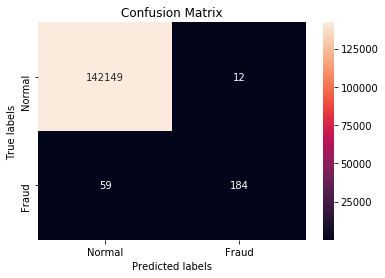

In [0]:
conf_matrix = metrics.confusion_matrix(y_test,knn_predicted)

ax=plt.subplot()
sns.heatmap(conf_matrix,annot=True,ax=ax,fmt='g')#annot=True to annotate cells, fmt='g' numbers not scientific form
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Normal', 'Fraud']); ax.yaxis.set_ticklabels(['Normal', 'Fraud']);
ax.set(yticks=[0, 2], 
       xticks=[0.5, 1.5])
ax.yaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0.5))